<h1>Case Study: Flowers CNN Classifier</h1>
Flowers dataset (https://www.kaggle.com/alxmamaev/flowers-recognition) 

**Set the appropriate path for the datsaet zip provided**

In [2]:
pwd

'/Users/premkishanmishra/Official/CV/W1 mentor'

In [9]:
ls


CV_WEEK_1.pptx                    Untitled.txt
CV_Week1_Case+Study.ipynb         flowers/
Copy of flowers.zip               mentor-cv-week1-case-study.ipynb


In [8]:
#unzip "Copy of flowers.zip"




SyntaxError: invalid syntax (3595676975.py, line 1)

In [3]:
!ls '/kaggle/input/glcv1-flowers/flowers/test'

daisy  dandelion  rose	sunflower  tulip


In [10]:
images_path = "/Users/premkishanmishra/Official/CV/W1 mentor/flowers"
!ls '/Users/premkishanmishra/Official/CV/W1 mentor/flowers/train'

daisy     dandelion rose      sunflower tulip


In [11]:
import os
import cv2

ModuleNotFoundError: No module named 'cv2'

**Extracting the dataset.zip to the present working directory**

In [6]:
# from zipfile import ZipFile
# with ZipFile(images_path,'r') as zip:
#   zip.extractall()

- You can check the currect working directory for the extracted file

### Data Extraction

In [7]:
dataset =  images_path + 'train'
print(dataset)
for i in os.listdir(dataset):
    for j in os.listdir(os.path.join(dataset, i)):
        print(os.path.join(dataset, i, j))
        dummy = cv2.imread(os.path.join(dataset, i, j))
        print(dummy.shape)
        #print(dummy)
        break
        # read each image inside train directory one by one
        #dummy = cv2.imread(os.path.join(dataset, i, j))
        #dummy = cv2.resize(dummy, (img, img))   # Resizing can
    break

/kaggle/input/glcv1-flowers/flowers/train
/kaggle/input/glcv1-flowers/flowers/train/dandelion/34578947551_863af3acb3_n.jpg
(159, 240, 3)


In [8]:
# img = cv2.imread("/kaggle/input/glcv1-flowers/flowers/train/dandelion/34578947551_863af3acb3_n.jpg")
# img.shape

In [9]:
dataset =  images_path + 'train'
X = []
y = []
labels = []
img=8
# list all folders inside train directory
for i in os.listdir(dataset):
    print(i)
    if i!= '.DS_Store':   #Specific to Mac
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        dummy = cv2.resize(dummy, (img, img))   # Resizing can be any number - 128 is just kept for standard reference
        X.append(dummy)
        y.append(i)

dandelion
daisy
sunflower
tulip
rose


In [10]:
len(X)

3823

In [11]:
X[3600].shape, y[3600]

((8, 8, 3), 'rose')

In [12]:
X[3600]

array([[[182, 176, 186],
        [150, 134, 160],
        [ 71, 100, 113],
        [ 32,  35,  63],
        [ 61,  59,  64],
        [ 84,  83,  88],
        [ 53,  50,  98],
        [ 85,  87,  90]],

       [[ 38,  33, 220],
        [ 42,  51,  62],
        [ 66,  48, 185],
        [ 67,  91, 149],
        [ 31,  32,  33],
        [ 28,  31,  28],
        [ 50,  49,  96],
        [110, 110, 111]],

       [[ 21,  59,  80],
        [ 38,  60,  75],
        [100, 149, 144],
        [ 77, 102, 142],
        [ 88,  69, 195],
        [ 78,  74,  81],
        [140, 133, 165],
        [184, 182, 187]],

       [[ 58, 103, 131],
        [ 23,  43,  44],
        [ 30,  61,  56],
        [ 66, 100, 111],
        [ 22,  14, 160],
        [222, 217, 223],
        [ 95, 107, 114],
        [253, 252, 252]],

       [[ 30,  59,  56],
        [163, 153, 187],
        [166, 149, 248],
        [ 67,  73, 145],
        [ 22,  13, 113],
        [198, 195, 207],
        [207, 199, 208],
        [229, 221

In [13]:
print(len(X), len(y))

3823 3823


- There are totally 3823 flowers in the given dataset with 5 classes

### Data Vizualization

[ 438  216 3076 1150 2150 2626 3715 2024 2510  456]


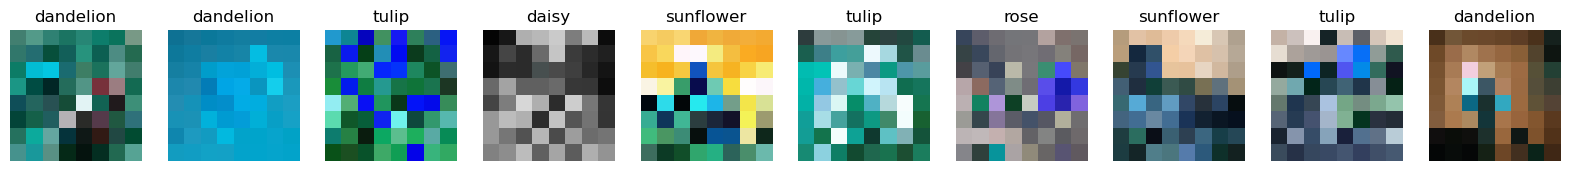

In [14]:
# visualizing the random images in the dataset along with their labels

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(X), 10) # Generating 10 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(X[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

### Image Exploration and Transformation

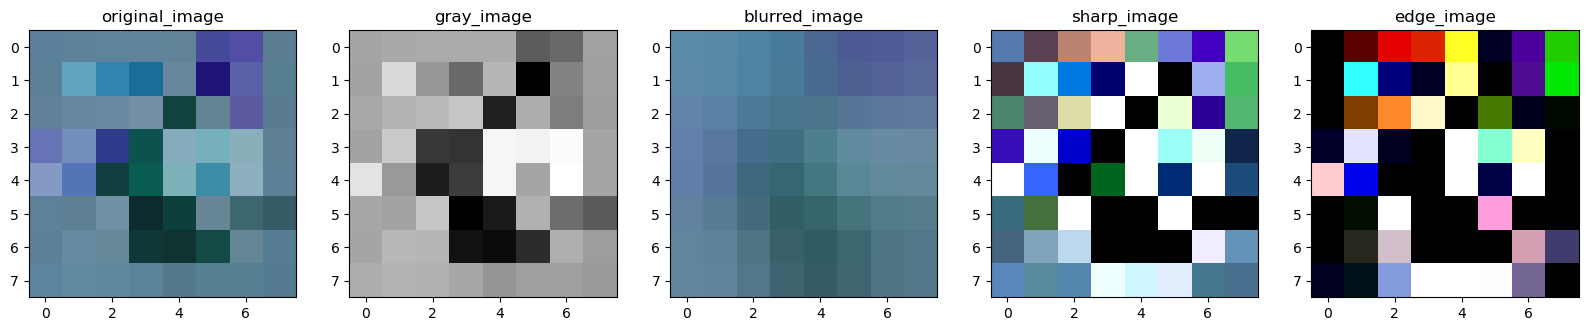

In [15]:
import random

# Original Image
img_org = random.choice(X)

# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)

# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

edge_filter = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)
edge_img = cv2.filter2D(img_org,kernel=edge_filter,ddepth=-1)

img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image','edge_image']

plt.figure(figsize=(20,20))
for i,img_ in enumerate([img_org, gray_image, blur_img, sharp_img,edge_img]):
    plt.subplot(1,5,i+1)
    plt.title(img_title[i])
    plt.imshow(img_,cmap='gray')

- For further image processing 'pillow' library can be used
- pillow library is one of the important library for image augmentation technique
- We can also use image datagenerator for image augmentation

### Train-Test Split

In [16]:
X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(3823, 8, 8, 3) (3823,)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Reshaping the train and test data as per the SL model requirement
img_shape = img*img*3
X_train_ML = X_train.astype('float32')
X_train_ML = X_train_ML.reshape(X_train_ML.shape[0], img_shape)
X_train_ML = X_train_ML/255

X_test_ML = X_test.astype('float32')
X_test_ML = X_test_ML.reshape(X_test_ML.shape[0], img_shape)
X_test_ML = X_test_ML/255

#y_train_ML = y_train.reshape(y_train.shape[0], 1)
#y_test_ML = y_test.reshape(y_test.shape[0], 1)


print('Train_Shape:', X_train_ML.shape, y_train.shape)
print('Test_Shape:', X_test_ML.shape, y_test.shape)

Train_Shape: (3058, 192) (3058,)
Test_Shape: (765, 192) (765,)


### Model Building - Supeveized Learning

In [19]:
# Logistic Regression

from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LogR = LogisticRegression()
LogR.fit(X_train_ML, y_train)

y_pred_lrt=LogR.predict(X_train_ML)
LogR_Accuracy_Train = accuracy_score(y_true=y_train, y_pred=y_pred_lrt)
print("Train Accuracy : ", LogR_Accuracy_Train)

y_pred_lrte = LogR.predict(X_test_ML)
LogR_Accuracy_Test = accuracy_score(y_true=y_test, y_pred=y_pred_lrte)
print("Test Accuracy : ", LogR_Accuracy_Test)

Train Accuracy :  0.5631131458469588
Test Accuracy :  0.45098039215686275


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
# NB - Find the best NBs kernels

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(X_train_ML, y_train)
    print ('Training kernel is =',k[i], '\tScore=',NB_Classifier.score(X_train_ML, y_train))
    print ('Test kernel is =',k[i], '\tScore=',NB_Classifier.score(X_test_ML, y_test))

Training kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.2540876389797253
Test kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.2130718954248366
Training kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.4296926095487247
Test kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.403921568627451


In [21]:
# NB - Model - Gaussian NB is used as per the result from the above code

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(X_train_ML, y_train)

y_pred_tr_NB = NB.predict(X_train_ML)
NB_Accuracy_Train=accuracy_score(y_train, y_pred_tr_NB)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred_ts_NB = NB.predict(X_test_ML)
NB_Accuracy_Test=accuracy_score(y_test, y_pred_ts_NB, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.4296926095487247
Test Accuracy :  0.403921568627451


In [22]:
# # SVM - Model

# from sklearn.svm import SVC
# SVM = SVC()
# SVM.fit(X_train_ML, y_train)

# SVM_Accuracy=SVM.score(X_train_ML, y_train)
# print("Train Accuracy : ", SVM_Accuracy)

# SVM_Accuracy=SVM.score(X_test_ML, y_test)
# print("Test Accuracy : ", SVM_Accuracy)

In [23]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3) # Best neighbors to be identified
KNN.fit(X_train_ML, y_train)

y_pred_tr_knn = KNN.predict(X_train_ML)
KNN_Accuracy_Train=accuracy_score(y_train, y_pred_tr_knn)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred_ts_knn = KNN.predict(X_test_ML)
KNN_Accuracy_Test=accuracy_score(y_test, y_pred_ts_knn)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.5493786788750817
Test Accuracy :  0.3241830065359477


In [24]:
# Decision Tree

# Library
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

# Model
model_DT=DecisionTreeClassifier(criterion='gini',
                                splitter='best',
                                max_depth=5)

model_DT.fit(X_train_ML, y_train)

# Accuracy
DT_Train=model_DT.score(X_train_ML, y_train)
DT_Test=model_DT.score(X_test_ML, y_test)

# Output
print("Train Accuracy:",DT_Train)
print("Test Accuracy:",DT_Test)

Train Accuracy: 0.46010464355788094
Test Accuracy: 0.3712418300653595


In [25]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=5)
model_RF.fit(X_train_ML, y_train)

# Accuracy
pred_RF = model_RF.predict(X_test_ML)
RF_Train = model_RF.score(X_train_ML, y_train)
RF_Test = accuracy_score(y_test, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.5909090909090909
Test Accuracy: 0.4470588235294118


In [26]:
# ADA Boosting

# Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model
model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10),    # SVC(), RandomForestClassifier(), GradientBoostingClassifier()
                            n_estimators=10,)
model_AB = model.fit(X_train_ML, y_train)

# Accuracy
AB_Train = model_AB.score(X_train_ML, y_train)
pred_AB =model_AB.predict(X_test_ML)
acc_AB = accuracy_score(y_test, pred_AB)

print("Train Accuracy:",AB_Train)
print("Test Accuracy:",acc_AB)

Train Accuracy: 0.9996729888816219
Test Accuracy: 0.465359477124183


In [27]:
# # GRADIENT BOOSTING
# import time
# start = time.time()
# # Library
# from sklearn.ensemble import GradientBoostingClassifier

# # Model
# model = GradientBoostingClassifier(loss='deviance',
#                                     learning_rate=0.1,
#                                     n_estimators=10,verbose=2)
# model_GB = model.fit(X_train_ML, y_train)

# # Accuracy
# GB_Train = model_GB.score(X_train_ML, y_train)
# pred_GB =model_GB.predict(X_test_ML)
# acc_GB = accuracy_score(y_test, pred_GB)

# print("Training Accuracy:",GB_Train)
# print("Testing Accuracy:",acc_GB)
# end =time.time()

# print((end-start)/60, " minutes")

In [28]:
y_train

array(['daisy', 'daisy', 'tulip', ..., 'rose', 'daisy', 'tulip'],
      dtype='<U9')

In [29]:
import pandas as pd
pd.get_dummies(y_train).shape

(3058, 5)

In [30]:
# Changing the Target parameter as per the requirement of the NN model

# one hot encode outputs
import pandas as pd
y_train_NN = pd.get_dummies(y_train)
y_test_NN = pd.get_dummies(y_test)

In [31]:
### define model

import tensorflow 
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


# create model
model = Sequential()  
model.add(BatchNormalization(input_shape = (img_shape,)))  ### Batch_Norm Layer
    
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
    
# Compile model
adam = optimizers.Adam(lr=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

# Fit the model
histroy = model.fit(X_train_ML, y_train_NN, validation_data=(X_test_ML, y_test_NN), epochs=15, batch_size=8, verbose=1)

Epoch 1/15
383/383 [==============================] - 10s 5ms/step - loss: 1.5015 - accuracy: 0.3244 - val_loss: 1.3592 - val_accuracy: 0.4026
Epoch 2/15
383/383 [==============================] - 2s 4ms/step - loss: 1.3480 - accuracy: 0.4068 - val_loss: 1.3286 - val_accuracy: 0.4353
Epoch 3/15
383/383 [==============================] - 2s 4ms/step - loss: 1.2863 - accuracy: 0.4503 - val_loss: 1.2829 - val_accuracy: 0.4340
Epoch 4/15
383/383 [==============================] - 2s 5ms/step - loss: 1.2331 - accuracy: 0.4751 - val_loss: 1.2409 - val_accuracy: 0.4693
Epoch 5/15
383/383 [==============================] - 2s 4ms/step - loss: 1.1751 - accuracy: 0.5154 - val_loss: 1.2368 - val_accuracy: 0.4980
Epoch 6/15
383/383 [==============================] - 2s 5ms/step - loss: 1.1465 - accuracy: 0.5294 - val_loss: 1.2398 - val_accuracy: 0.4771
Epoch 7/15
383/383 [==============================] - 2s 5ms/step - loss: 1.0947 - accuracy: 0.5526 - val_loss: 1.2547 - val_accuracy: 0.5098
Epoch

Text(0.5, 1.0, 'Training and validation loss')

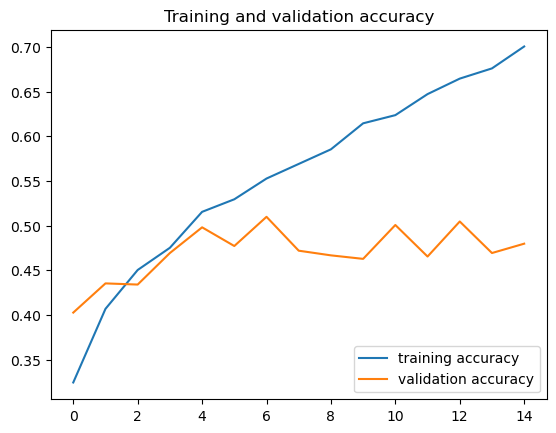

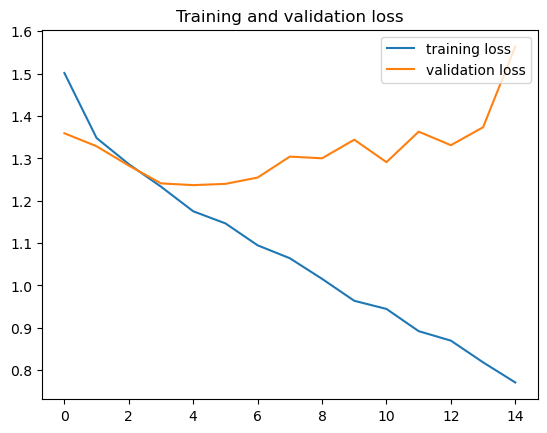

In [32]:
## Accuracy and Loss plots

accuracy      = histroy.history['accuracy']
val_accuracy  = histroy.history['val_accuracy']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [33]:
# Comparison table

Comparison1 = pd.DataFrame({'Method':['Logistic Regression'], 'Train accuracy': LogR_Accuracy_Train, 
                           'Test accuracy': LogR_Accuracy_Test})
Comparison1 = Comparison1[['Method', 'Train accuracy', 'Test accuracy']]


Comparison2 = pd.DataFrame({'Method':['Naive Bayes Regression'], 'Train accuracy': NB_Accuracy_Train, 
                           'Test accuracy': NB_Accuracy_Test},)
Comparison2 = Comparison2[['Method', 'Train accuracy', 'Test accuracy']]


Comparison3 = pd.DataFrame({'Method':['KNN'], 'Train accuracy': KNN_Accuracy_Train, 
                           'Test accuracy': KNN_Accuracy_Test})
Comparison3 = Comparison3[['Method', 'Train accuracy', 'Test accuracy']]


# Comparison4 = pd.DataFrame({'Method':['SVM'], 'Train accuracy': DT_Train, 
#                            'Test accuracy': DT_Test})
# Comparison4 = Comparison4[['Method', 'Train accuracy', 'Test accuracy']]


Comparison5 = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': LogR_Accuracy_Train, 
                            'Test accuracy': LogR_Accuracy_Test})
Comparison5 = Comparison5[['Method', 'Train accuracy', 'Test accuracy']]



Comparison6 = pd.DataFrame({'Method':['Random Forest'], 'Train accuracy': RF_Train, 
                           'Test accuracy': RF_Test})
Comparison6 = Comparison6[['Method', 'Train accuracy', 'Test accuracy']]



# Comparison7 = pd.DataFrame({'Method':['Gradient Boosting'], 'Train accuracy': GB_Train, 
#                            'Test accuracy': acc_GB})
# Comparison7 = Comparison7[['Method', 'Train accuracy', 'Test accuracy']]



Comparison8 = pd.DataFrame({'Method':['ADA Boosting'], 'Train accuracy': AB_Train, 
                           'Test accuracy': acc_AB})
Comparison8 = Comparison8[['Method', 'Train accuracy', 'Test accuracy']]


Comparison9 = pd.DataFrame({'Method':['Neural Network'], 'Train accuracy': max(accuracy), 
                           'Test accuracy': max(val_accuracy)})
Comparison9 = Comparison9[['Method', 'Train accuracy', 'Test accuracy']]

Comparison = pd.concat([Comparison1, Comparison2,Comparison3,#Comparison4,
                        Comparison5,Comparison6,
                        #Comparison7,
                        Comparison8, Comparison9])

Comparison

,Method,Train accuracy,Test accuracy
0,Logistic Regression,0.563113,0.450980
0,Naive Bayes Regression,0.429693,0.403922
0,KNN,0.549379,0.324183
0,Decision Tree,0.563113,0.450980
0,Random Forest,0.590909,0.447059
0,ADA Boosting,0.999673,0.465359
0,Neural Network,0.700458,0.509804


- On comapring the model performance between NN tend to perform comparitively better than all the other supervized learning models

In [34]:
val_pred = model.predict(X_test_ML)

24/24 [==============================] - 0s 2ms/step


In [35]:
y_test_NN.iloc[0].values

array([0, 0, 0, 1, 0], dtype=uint8)

labels: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
1/1 [==============================] - 0s 25ms/step
Softmax Outputs: [[0.05701731 0.08589429 0.5134661  0.03595416 0.30766815]]
1.0
Predicted_Label: rose


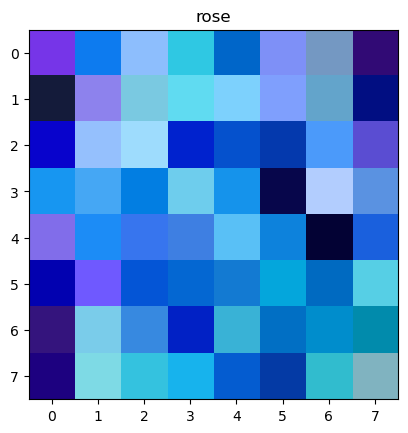

In [36]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = 300
labels = y_test_NN.iloc[n].index.tolist()
print('labels:', labels)
plt.title(y_test[n])
plt.imshow(X_test[n])
y_pred = model.predict(X_test_ML[n].reshape(1, img_shape))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())


# Convert the predicted probabilities to labels

print('Predicted_Label:',labels[np.argmax(y_pred)])